# Ejercicio de programación Regresión Lineal Multiple

In [180]:
# utilizado para manejos de directorios y rutas
import os
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np
import csv
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio de las casas. El archivo `Sport_car_price.csv` contiene un conjunto de entrenamiento de precios de casas en Portland, Oregon. La primera columna es el tamaño de la casa en metros cuadrados, la segunda columna es el numero de cuartos, y la tercera columna es el precio de la casa. 

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [181]:
# Cargar datos
# https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset
data = pd.read_csv('Sport_car_price.csv')
data

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [182]:
# Abrir el archivo CSV para lectura
with open('Sport_car_price.csv', 'r') as file:
    # Crear un objeto lector CSV
    reader = csv.reader(file)
    # Leer todas las filas en una lista y saltar la primera fila
    rows = [row for i, row in enumerate(reader) if i > 0]
    # Convertir la lista de filas en una matriz numpy
    data = np.array(rows)
    # Obtener las columnas de la matriz
    col1 = data[:, 2]
    col2 = data[:, 3]
    col3 = data[:, 4]
    col4 = data[:, 5]
    col5 = data[:, 6]
    y = data[:, 7]

In [183]:
# cambriar variables cualitativos a cuantitativos de la col2
col2[col2 == 'Electric'] = '0'
col2[col2 == 'N/A'] = '0'
col2[col2 == '-'] = '0'
col2[col2 == 'Hybrid'] = '0'
# cambriar variables cualitativos a cuantitativos de la col3
col3[col3 == '1000+'] = '1000'
col3[col3 == '1,000+'] = '1000'
col3[col3 == '10000+'] = '10000'
col3[col3 == '10,000+'] = '10000'
col3[col3 == '10,000'] = '10000'
col3[col3 == '1,500'] = '1500'
col3[col3 == '1,020'] = '1020'
# cambriar variables cualitativos a cuantitativos de la col4
col4[col4 == '-'] = '0'
col4[col4 == '10,000+'] = '10000'
col4[col4 == 'N/A'] = '0'
col4[col4 == '7,376'] = '7376'
col4[col4 == '1,180'] = '1180'
col4[col4 == '1,050'] = '1050'
# cambriar variables cualitativos a cuantitativos de la col5
col5[col5 == '< 1.9'] = '1.9'

In [184]:
# Convertir los arreglos de x de strings a un arreglo de floats
col1 = col1.astype(np.float64).reshape(-1, 1)
col2 = col2.astype(np.float64).reshape(-1, 1)
col3 = col3.astype(np.float64).reshape(-1, 1)
col4 = col4.astype(np.float64).reshape(-1, 1)
col5 = col5.astype(np.float64).reshape(-1, 1)

In [185]:
# Reemplazar la coma por una cadena vacía en todos los elementos del arreglo
y = np.char.replace(y, ',', '')

In [186]:
# Convertir los arreglos de x de strings a un arreglo de floats
y = y.astype(np.float64)

In [187]:
# Unir los dos vectores en una matriz de dos columnas
x = np.hstack((col1, col2, col3, col4, col5))

In [193]:
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'y'))
print('-'*52)
for i in range(10):
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}'.format(x[i, 0], x[i, 1], x[i, 2], x[i, 3], x[i, 4], y[i]))

  X[:,0] X[:, 1] X[:, 2] X[:, 3] X[:, 4]         y
----------------------------------------------------
    2022       3     379     331       4    101200
    2021       5     630     443       3    274390
    2022       4     661     561       3    333750
    2022       5     562     406       3    142700
    2021       4     710     568       3    298000
    2022       4     617     553       3    130000
    2021       4     523     494       4    118500
    2021       6     490     465       3     59900
    2022       5     760     625       4     81000
    2021       4     600     481       2    212000


In [195]:
# normalizacion de caracteristicas
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [196]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(x)

print(x)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.022e+03 3.000e+00 3.790e+02 3.310e+02 4.000e+00]
 [2.021e+03 5.200e+00 6.300e+02 4.430e+02 2.800e+00]
 [2.022e+03 3.900e+00 6.610e+02 5.610e+02 3.000e+00]
 ...
 [2.021e+03 4.000e+00 7.890e+02 5.900e+02 2.700e+00]
 [2.021e+03 6.000e+00 7.640e+02 7.380e+02 3.000e+00]
 [2.021e+03 0.000e+00 1.888e+03 1.696e+03 1.850e+00]]
Media calculada: [2021.20158888    4.14617676  657.98411122  557.34756703    3.51340616]
Desviación estandar calculada: [  2.01879881   1.69464452 592.72332095 441.68752222   0.77725296]
[[ 0.39548821 -0.67635233 -0.47068185 -0.51246086  0.62604309]
 [-0.09985585  0.62185504 -0.04721277 -0.25888793 -0.91785583]
 [ 0.39548821 -0.14526749  0.00508819  0.00826927 -0.66053934]
 ...
 [-0.09985585 -0.08625807  0.22104055  0.07392655 -1.04651407]
 [-0.09985585  1.09393045  0.17886235  0.40900506 -0.66053934]
 [-0.09985585 -2.4466351   2.07519402  2.57795925 -2.14010913]]


In [202]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
m = y.size
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.          0.39548821 -0.67635233 -0.47068185 -0.51246086  0.62604309]
 [ 1.         -0.09985585  0.62185504 -0.04721277 -0.25888793 -0.91785583]
 [ 1.          0.39548821 -0.14526749  0.00508819  0.00826927 -0.66053934]
 ...
 [ 1.         -0.09985585 -0.08625807  0.22104055  0.07392655 -1.04651407]
 [ 1.         -0.09985585  1.09393045  0.17886235  0.40900506 -0.66053934]
 [ 1.         -0.09985585 -2.4466351   2.07519402  2.57795925 -2.14010913]]


In [203]:
# funcion del costo
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J

In [204]:
# funcion descenso por gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 305027.69170801  -16117.71446478  102898.17691606  130528.0227711
  136558.37431704 -208959.65679647]


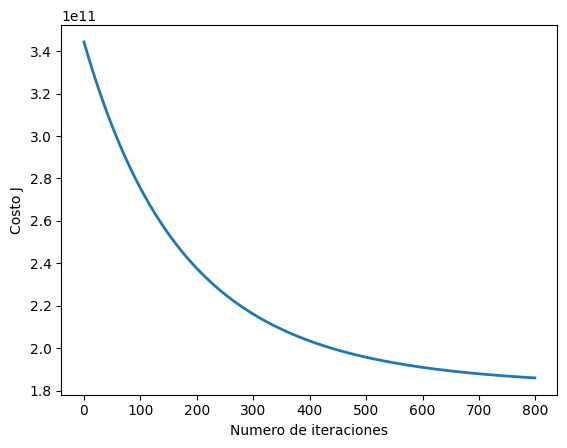

In [224]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.002 # alpha = 0.003
num_iters = 800

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [247]:
# Estimar el precio para un coche con las siguientes caracteristicas
año = 2015 # año que se salio le auto
tam_motor = 5.5 # tamaño en litros
caballos_fuerza = 130 # caballos de fuerza
revoluciones = 500 # torque del motor o revoluciones
aceleracion = 0.5 # tiempo que tarda el auto deportivo en acelerar de 0 a 60 millas por hora

X_array = [1, año, tam_motor, caballos_fuerza, revoluciones, aceleracion]
X_array[1:6] = (X_array[1:6] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para un coche con caracteristicas dadas (usando el descenso por el gradiente) es: ${:.2f}'.format(price))

El precio predecido para un coche con caracteristicas dadas (usando el descenso por el gradiente) es: $1112877.59
